<a href="https://colab.research.google.com/github/hnishi/jupyterbook-hnishi/blob/colab-dev/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# クラスタ分析

## 概要

- クラスタ分析は、教師なし学習に属する
- 正しい答えが事前にわかっていないデータから隠れた構造を見つけ出す
- データを自然なグループにまとめる方法を見つけ出す
- クラスタリングのカテゴリ
    - プロトタイプベース
    - 階層的
    - 密度ベース
    - グラフベース（今回は説明しない）
      - Spectral clustering algorithm: 距離行列の固有ベクトルを使用する

---    
    
**scikit-learn で利用できるクラスタリングアルゴリズムの比較**

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png" width="100%">

https://scikit-learn.org/stable/modules/clustering.html#clustering


In [ ]:
from IPython.display import Image
%matplotlib inline

## k-means 法

- プロトタイプベースクラスタリングの１つ
    - プロトタイプベースクラスタリングとは、各クラスタがプロトタイプによって表されることを意味する
    - プロトタイプは、セントロイド（中心）かメドイド（代表点）かのどちらか
- 球状（または円状）のクラスタの識別に適している
- クラスタの個数 k を指定する必要がある

---

### 計算の主要な手順

  1. クラスタの中心（セントロイド）の初期値として、サンプル店から k 個をランダムに選ぶ
  1. 各サンプルを最も近いセントロイドに割り当てる
  1. 各クラスタに割り当てられたサンプルの中心を、そのクラスターの新しいセントロイドとする
  1. サンプル点のクラスタへの割合が変化しなくなるか、ユーザー定義の許容値またはイテレーションの最大回数に達するまで、手順 "2."、"3." を繰り返す


- サンプルとセントロイドの距離は、ユークリッド距離の2乗がよく用いられる
  - m 次元空間の 2 点 ${\bf x}$ と ${\bf y}$ のユークリッド距離の２乗は以下
$$ d({\bf x},{\bf y})^{2}=\sum ^{m}_{j=1}(x_{j}-y_{j})^2=||{\bf x}-{\bf y}|| ^2 $$
- クラスタ内誤差平方和 (SSE) を最小化する問題
$$ SSE=\sum ^{n}_{i=1} \sum ^{k}_{j=1} w^{(i,j)}||{\bf x}^{(i)}-{\bf \mu}^{(j)}|| ^2 $$
  - n: サンプル数
  - k: クラスタ数
  - i: サンプルのインデックス
  - j: クラスタのインデックス
  - $\mu^{(j)}$: クラスタjのセントロイド
  - $w^{(i,j)}$: サンプル点 ${\bf x}^{(i)}$ がクラスタj に存在する場合は1、そうでない場合は0






### scikit-learn を使った K-means クラスタリング 

In [ ]:
# ダミーデータの作成
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

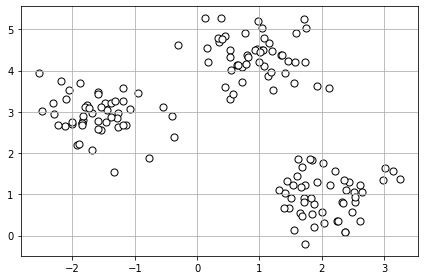

In [ ]:
# ダミーデータの分布を可視化
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

In [ ]:
# K-means
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,   # クラスタの数
            init='random',   # セントロイドの初期化の方法
            n_init=10,   # 異なるセントロイド初期化を使った k-means の試行回数 --> 試行回数の中からベスト (SSEが最も小さい) なモデルを最終モデルとする
            max_iter=300,  # 最大イテレーション回数
            tol=1e-04,  # 収束判定のための相対的な許容誤差
            random_state=0)  # セントロイドの初期化のためのランダムシード

y_km = km.fit_predict(X)

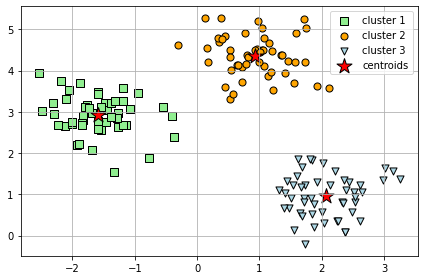

In [ ]:
# 結果の可視化
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

<br>

### よりスマートなセントロイドの初期化方法 : k-means++

- [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) の セントロイド初期化方法のデフォルト
- 計算手順は以下
1. 1つ目のセントロイドは、サンプルXの中からランダムに選ぶ
1.  次のセントロイドを、以下の確率分布に従って選ぶ（既に選ばれたセントロイドより遠い位置の方が選ばれやすくなるように）
$$\dfrac {D\left( x\right) ^{2}}{\sum _{x \in X}D\left( x\right) ^{2}} $$
1. "2." の手順を k 個まで繰り返す

Ref: 
Arthur, D., and S. Vassilvitskii. "k-means++: the advantages of careful seeding, p 1027–1035." SODA'07: proceedings of the eighteenth annual ACM-SIAM symposium on discrete algorithms. Society for Industrial and Applied Mathematics, Philadelphia, PA. 2007.

## ハードクラスタリングとソフトクラスタリング

ここでは、紹介のみ（詳細な説明はしない）。

- ハードクラスタリング
  - サンプルが所属するクラスタは１つのみ
  - 例：k-means
- ソフトクラスタリング（ファジークラスタリング）
  - サンプルを１つ以上のクラスタに割り当てる
  - 例：
    - Fuzzy C-means (FCM)
    - Soft k-means (Fuzzy k-means)
- FCM のイテレーションの計算コストは k-means より高いが、収束は k-means より早い
- FCM は scikit-learn では実装されていない
  - FCM が実装されている Python ライブラリ
    - [scikit-fuzzy](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html)
    - [peach](https://code.google.com/archive/p/peach/)


### クラスタの最適な個数を決めるための指標（エルボー法）

- k-means の課題である、クラスタの個数を事前に決めなければならない問題を解決かもしれない
- エルボー法は、タスクに最適なクラスタの個数 k を推定できる
- 横軸にクラスタの数、縦軸に得られたモデルのクラスタ内平方誤差（SSE）をプロットし、歪みが最も急速に増え始める k の値を特定する

In [ ]:
# Distortion = SSE = kn.inertia_
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


以下のグラフのから、k = 3 が良い選択であるという根拠が得られる。

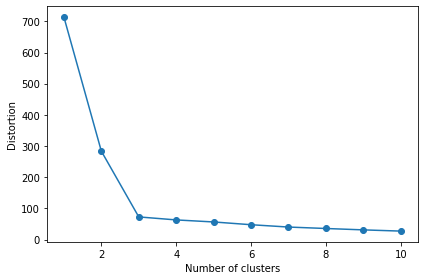

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

> 実のところ、エルボー法は、そんなに良くは使われていない。  
その理由の一つには、 実際にこれをクラスタの問題に 使ってみると、かなりしばしば、もっと曖昧な、曲線が得られる事がある。  
明確なエルボーは無いように見える（ディストーションは連続的に低下していってるように見える）。  
その場合はエルボー手法を使ってクラスタの数を決めるのはより難しい。  
つまり簡単にエルボー法について要約すると、一発試してみる価値はある、だがどんな問題にもとてもうまくいく、などと期待はしない方がいい。

Ref: [Andrew Ng先生の講義](https://www.coursera.org/learn/machine-learning)

クラスタの個数を選ぶ別の方法は、どういう目的であなたが K-meansを実行しているのか、という事を問うてみる事だ。  
たとえば、服のサイズを決めるためにヒトの身長と体重の分布をクラスタリングする場合、最終的に用意したいサイズの種類の数でクラスタリングする（S, M, L の３つ等）。

## シルエット分析 (silhouette analysis) を使ってクラスタリングの性能を評価する


- 各サンプルのシルエット係数を計算する

1. 凝集度$a^{(i)}$: N個のサンプルを持つクラスタＡのサンプル {$x^{(i)}|i \in A$} と同じクラスタの別のサンプル{$x^{(j)}|j \neq i,and,j \in A$}との平均距離
$$ a^{(i)}=\sum_{j=1}^{N}\frac{|x^{(i)}-x^{(j)}|}{N} $$
1. 乖離度$b^{(i)}$: クラスタAのサンプル {$x^{(i)}|i \in A$} とM個のサンプルを持つクラスタBのサンプル {$x^{(m)}|i \in B$} との平均距離
$$ b^{(i)}=\sum_{m=1}^{M}\frac{|x^{(i)}-x^{(m)}|}{M} $$
1. シルエット係数$s^{(i)}$: クラスタの凝集度と乖離度の差を、それらの内の大きい方で割ったもの
$$ s^{(i)}=\frac{b^{(i)}-a^{(i)}}{max\{b^{(i)},a^{(i)}\}} $$
  - 値の範囲は、-1 から 1
  - b = a で 0
  - b >> a で 1 (理想的な値)

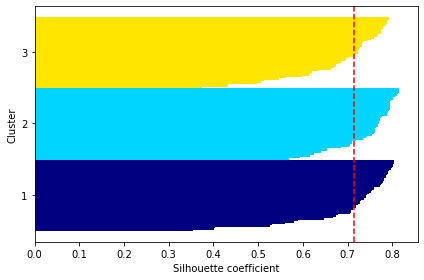

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

- 赤の点数は、シルエット係数の平均値

以下は、悪いクラスタリングの例 (k = 5)

0
1
2
3
4


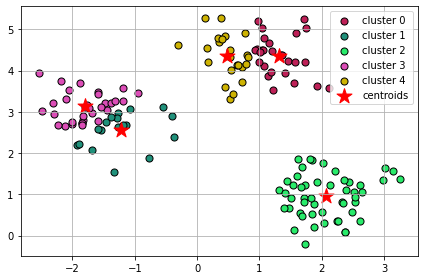

In [ ]:
# クラスター数の指定
k = 5

km = KMeans(n_clusters=k, 
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

# create an array of colors in python
# ref: https://stackoverflow.com/questions/7827530/array-of-colors-in-python
from random import randint
colors = []
for i in range(k):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for i in range(k):
  print(i)
  plt.scatter(X[y_km == i, 0],
              X[y_km == i, 1],
              s=50,
              c=colors[i],
              edgecolor='black',
              marker='o',
              label='cluster ' + str(i))

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

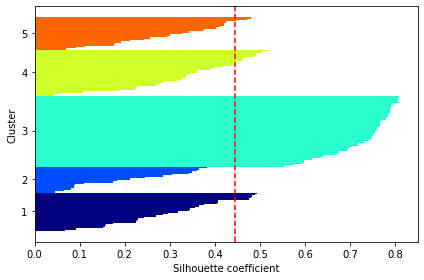

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

- クラスタごとのシルエット係数とサンプル数（水平棒グラフの長さと幅）が、大きく異なっており、最適なクラスタリングではないことを示している。

## 階層木 (hierarchical tree) 

- 階層的クラスタリングによって樹形図（dendrogram）をプロットできる
  - 二分木の階層的クラスタリングを可視化
- ２つのアプローチ
  - 凝集型（agglomerative）（ボトムアップ方式）
    - 小さなクラスタをマージして大きなクラスタを作成していく
  - 分割型（divisive）(トップダウン方式) 
    - １つのクラスタから小さなクラスタに分割していく


### 凝集型階層的クラスタリング（ボトムアップ方式）

- 標準アルゴリズム
  - 単連結方
    - 最も類似度の高いメンバーどうしの距離が最小になるように２つのクラスタをマージ
  - 完全連結法
    - 最も類似度の低いメンバーどうしの距離が最小になるように２つのクラスタをマージ

今回は、「完全連結法に基づく凝集型階層的クラスタリング」に焦点をあてて説明する。

---

### 完全連結法に基づく凝集型階層的クラスタリングの主要な手順

1. すべてのサンプルのデータ点を、単一のクラスタとみなす
1. 全てのクラスタの距離行列（最も距離の離れたメンバー間の距離）を計算する
1. 手順 2 で計算した距離に基づいて、2つの最も近いクラスターをマージする
1. 距離行列を更新する
1. クラスターが１つになるまで、手順 3, 4 を繰り返す


<img src="https://raw.github.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch11/images/11_07.png" width="50%">

In [ ]:
# ダミーデータの作成
# 特徴量は 3 つ

import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

### 階層木クラスタリングの実行

In [ ]:
from scipy.spatial.distance import pdist, squareform

# 特徴量 X, Y, Z のユークリッド距離を求める 
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
# 距離行列
row_dist

# Ref: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [ ]:
# linkage 関数の間違った使い方: 正方距離行列
# 詳しくは、 https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage を参照。

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [ ]:
# linkage 関数の正しい使い方 1: 圧縮された距離行列（上三角のみの１次元配列）

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [ ]:
# linkage 関数の正しい使い方 2: 距離行列を作成する前の特徴量（サンプル数 x 次元数の2次元配列）

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


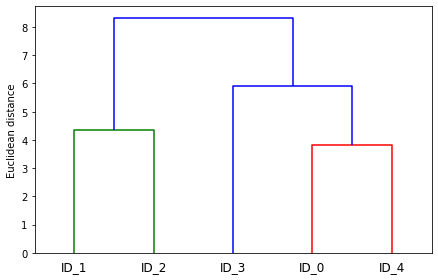

In [ ]:
# デンドログラム（樹形図）の作成
from scipy.cluster.hierarchy import dendrogram

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('images/11_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

### デンドログラムとヒートマップを合わせて表示する

- 樹形図とヒートマップは組み合わせて示されることが多い
- ヒートマップは個々のサンプルの特徴量の値を示している
- 特徴量の値と類似度の関係を視覚化できる


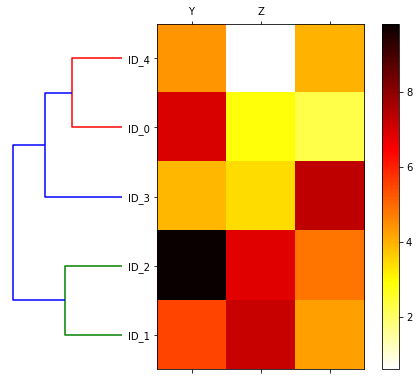

In [ ]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])  # x 軸の位置、y 軸の位置、幅、高さ 

# 樹形図を 90 度回転
# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# 特徴量のサンプルの順序を、クラスタリング結果に従って変更する
# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

# 樹形図の ticks を削除
axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
    i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

特徴量を見ると、たしかに、ID_1 と ID_2 のサンプルが似ているということがわかる。

### scikit-learn を使った凝集型階層的クラスタリング

- クラスタの数を指定することができる（階層クラスタ木の剪定）

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# クラスタ数 3
ac = AgglomerativeClustering(n_clusters=3,  # クラスタの個数
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [ ]:
# クラスタ数 2
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


ラベルを見ると、たしかに、指定したクラスタ数で選定されていることがわかる。

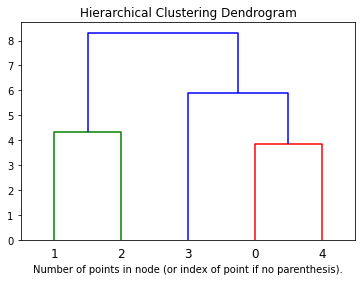

In [ ]:
# scikit-learn を使ったデンドログラムのプロット
# Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# for iris data set
# iris = load_iris()
# X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
# in this case, n_clusters must be "None"
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = AgglomerativeClustering(n_clusters=None, 
                             affinity='euclidean', 
                             linkage='complete',
                             distance_threshold=0)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 密度ベースのクラスタリング (DBSCAN)

### DBSCAN: Density-based Spatial Clustering of Applications with Noise

- 指定された半径 $\epsilon$ 以内に存在する点の個数を「密度」と定義する
- 半径 $\epsilon$ 以内の隣接店の個数が MinPts に少なくとも指定された個数（MinPts）の隣接点があるような点は Core point とラベル付けする
- Core point の条件には当てはまらないが、Core point の半径 $\epsilon$ 以内に位置する点を Border point とラベル付けする
- Core point でも Border point でもない点は、Noise point とラベル付けする


<img src="https://raw.github.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch11/images/11_13.png" width="50%">

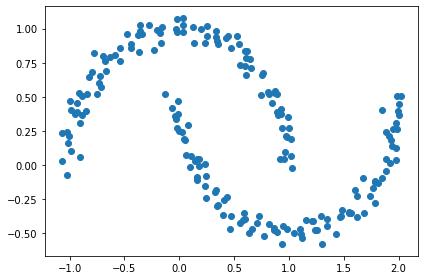

In [ ]:
# 半月状に分布したダミーデータを作成する
from sklearn.datasets import make_moons

# 100 個ずつの２グループを作成し、ノイズをのせる
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

#### k-means と 階層的クラスタリング

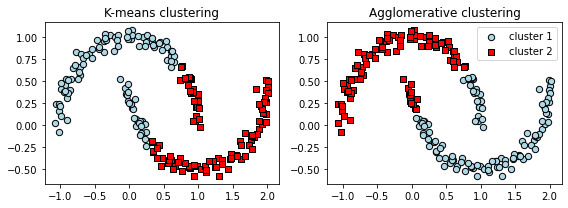

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
# plt.savefig('images/11_15.png', dpi=300)
plt.show()

#### 密度ベースのクラスタリング

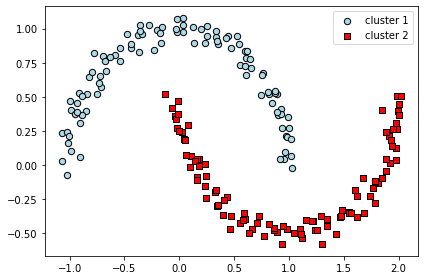

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

k-means と階層的クラスタリングより、DBSCANの方が半月状に分布したデータをうまくクラスタリングできていることがわかる。

- DBSCAN のメリット
  - クラスタが球状でなくても良い
  - クラスタ数を指定なくても良い
  - DBSCAN 自体にノイズ点を除去する能力がある
- DBSCAN のデメリット
  - 2つのハイパーパラメータ、MinPts と $\epsilon$ を最適化する必要がある
  - クラスター間で密度の違いがある場合は、適用が難しい


<br>
<br>

## まとめ

- 以下の３つのカテゴリのクラスタリング手法を紹介した
    - プロトタイプベース（k-means）
    - 階層的(完全連結法に基づく凝集型階層的クラスタリング)
    - 密度ベース（DBSCAN）
- 特徴量の次元が増えるとクラスタリング性能に悪影響を与えるため、PCA等の次元削減を行うのが一般的

## References

1.  [［第2版］Python機械学習プログラミング 達人データサイエンティストによる理論と実践](https://book.impress.co.jp/books/1117101099) , Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition
1. [Andrew Ng先生の講義](https://www.coursera.org/learn/machine-learning)
1. [scikit-learn](https://scikit-learn.org/stable/)
1. [k-means++](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf)

## Appendices

様々なクラスタリング手法の比較

https://gist.github.com/hnishi/f7bc10bd7d94da14507aab00096869fd
